## **CYCLEGAN MODEL**

### **Working Environment Setups**

In [1]:
# Read file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


Clone the existing CycleGAN model repository

In [ ]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix


Change working directory to cloned repository

In [3]:
%cd pytorch-CycleGAN-and-pix2pix

/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix


Installing the requirements specified in TXT file as instructed by the model owner

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408194 sha256=4cc4e87f58e9058fde2ef2c54ee1433e347c87a1c0485a87feb4add9f314092e
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


###**Dataset Preparation**
To streamline the training process and optimize GPU resource utilization, I curated a custom dataset for the Human2catsdogs experiment within the pytorch-CycleGAN-and-pix2pix/dataset directory.

**Selection Process**
Reducing Dataset Size: The initial dataset provided was extensive, leading to longer training times and significant GPU resource consumption. To address this, I opted to downsize the dataset.

**Celebrity Images and Cropped Images:** I selected 1500 high-quality celebrity images and an equal number of cropped images, totaling 3000 images. These were combined into the trainA folder within the dataset directory. Similarly 50 cropped images and 50 celebs images for testing were added in testA folder of dataset.

**Animal Images:** In parallel, I collected 1500 images each of cats and dogs, amounting to 3000 animal images. These were placed in the trainB folder of the dataset. Additionally 50 cats and 50 dogs images were added in testB folder of dataset

**Ensuring Data Balance**
To maintain data integrity and prevent bias during training, I ensured an equal representation of images from each category. By selecting an equal number of images from celebrities, cropped images, cats, and dogs, I aimed to create a balanced dataset.

# Pretrained models

Although numerous pretrained models are available, none of them directly address our specific problem statement. Therefore, we opt to bypass this step and proceed with training our model separately in the subsequent steps.

But one can use existing model with below command.
Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
#!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2024-02-28 10:34:22--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  14.1MB/s    in 3.4s    

2024-02-28 10:34:26 (12.8 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



### **Training**



Here's a breakdown of the command and its parameters:

!python train.py: This command executes a Python script named "train.py". The exclamation mark ! suggests that this command is being run in a shell or terminal environment.

* dataroot ./datasets/human2catsdogs: Specifies the root directory of the dataset. In this case, it's "./datasets/human2catsdogs", indicating that the dataset files are located in the "human2catsdogs" directory within the "datasets" directory.

* name human2catsdogs: Sets the name of the experiment or the output directory where training logs, checkpoints, and other outputs will be saved. In this case, it's named "human2catsdogs".

* model cycle_gan: Specifies the model to be trained. Here, it indicates the use of a CycleGAN model architecture.

* display_id -1: Determines the display ID for visualization during training. A value of "-1" usually means that no visualization will be displayed during training.

* n_epochs 20: Sets the number of epochs for the initial training phase. In this case, the model will be trained for 20 epochs.

* n_epochs_decay 5: Specifies the number of epochs for the decay phase of training. After the initial epochs specified by --n_epochs, the learning rate will decay gradually over an additional 5 epochs.


**Hyperparameter Tuning** :

Number of epoch is set to 20 and decaying epoch to 5.  Using a smaller number of epochs reduces the overall training time, which can be beneficial, especially when dealing with large datasets or complex models. Training for too many epochs can lead to overfitting, where the model learns to memorize the training data instead of generalizing from it. Therefore, limiting the number of epochs can help prevent overfitting.

Decaying the number of epochs can be useful for models that may benefit from a gradual reduction in learning rate over time. This approach allows the model to initially learn quickly with a higher learning rate and then fine-tune its parameters with a lower learning rate as it approaches convergence. Decaying the epochs can help the model converge to a better solution more efficiently.

Time taken in training approximately 470 sec per epoch. Total time to train whole dataset was 2-3 hours.

In [ ]:
!python train.py --dataroot ./datasets/human2catsdogs --name human2catsdogs --model cycle_gan --display_id -1 --n_epochs 20 --n_epochs_decay 5


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/My Drive/cycle_gan_checkpoints	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/human2catsdogs     	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                   

Once the model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.

**G(A) -> G(B)** : Converting Original face image to cats/dogs

In [ ]:
cp ./checkpoints/human2catsdogs/latest_net_G_A.pth ./checkpoints/human2catsdogs_pretrained/latest_net_G.pth

**G(B) -> G(A)** - Reverting fake cats/dogs image to real human faces

In [17]:
cp ./checkpoints/human2catsdogs/latest_net_G_B.pth ./checkpoints/human2catsdogs_pretrained/latest_net_G.pth

In [20]:
!python test.py --dataroot ./datasets/human2catsdogs/testB --name human2catsdogs_pretrained --model test --no_dropout --results_dir Reversecatsdogs2humanresluts

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/human2catsdogs/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                           

**REUSABILITY OF TRAINED MODEL** - The reusability of a trained model involves accessing it from the checkpoints directory after it has been saved following the training process as shown in command below.

In [8]:
!pip install dominate

!python test.py --dataroot ./datasets/human2catsdogs/testA/ --name human2catsdogs --model test --no_dropout --results_dir Results --checkpoints_dir ./checkpoints/

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints/                	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: ./datasets/human2catsdogs/testA/	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0 

### **Testing**

After training a pretrained model is created and we will use that to test on unseen data i.e staff images. The result are stored in anew folder created in working directory called human2catsdogs_results_staff

**Converting Staff face to cat/dog using human2catsdogs pretrained model (built above)**

In [ ]:
!python test.py --dataroot ./datasets/human2catsdogs/Staff_members --name human2catsdogs_pretrained --model test --no_dropout --results_dir humans2catsdogs_results_staff

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/human2catsdogs/Staff_members	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                   

Additionally, I have attempted to implement the functionality of G(B) -> G(A) to demonstrate the consistency within our trained model. Using below command.

**Converting back Staff face from cat/dog to original using human2catsdogs pretrained model (built above)**

In [21]:
!python test.py --dataroot ./humans2catsdogs_results_staff/human2catsdogs_pretrained/test_latest/images/ --name human2catsdogs_pretrained --model test --no_dropout --results_dir ReverseStaffsResults

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./humans2catsdogs_results_staff/human2catsdogs_pretrained/test_latest/images/	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

Tried same for testA data results

In [16]:
!python test.py --dataroot ./Results/human2catsdogs/test_latest/images/ --name human2catsdogs_pretrained --model test --no_dropout --results_dir TestAResultReverse

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./Results/human2catsdogs/test_latest/images/	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0              

# Visualize

ORIGINAL REAL FACE

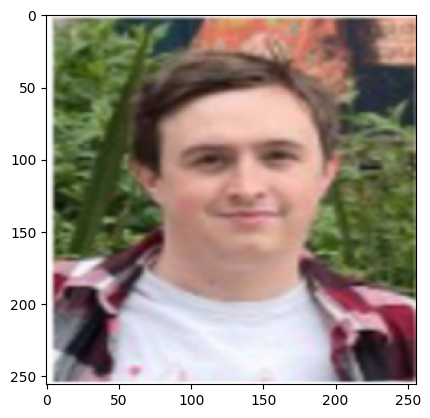

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./humans2catsdogs_results_staff/human2catsdogs_pretrained/test_latest/images/Staff-1_real.png')
plt.imshow(img)

CONVERTED CATS/DOGS FACE

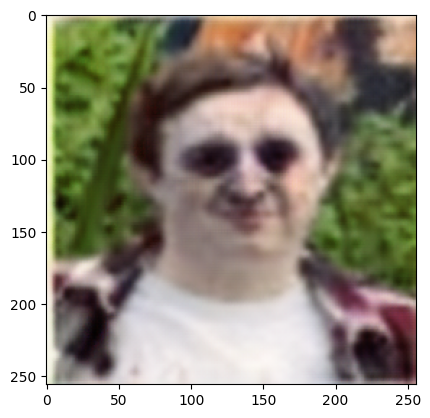

In [ ]:
img = plt.imread('./humans2catsdogs_results_staff/human2catsdogs_pretrained/test_latest/images/Staff-1_fake.png')
plt.imshow(img)

REVERTED TO ORIGINAL FACE

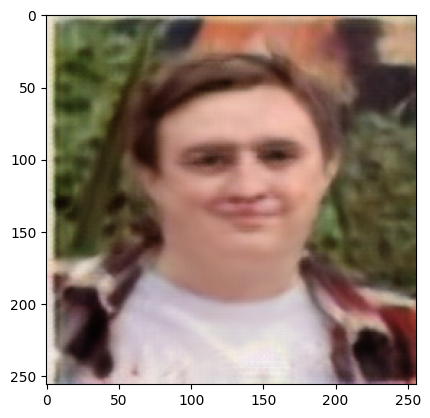

In [24]:
img = plt.imread('./ReverseStaffsResults/human2catsdogs_pretrained/test_latest/images/Staff-1_fake_fake.png')
plt.imshow(img)

CELEBRITY FACES

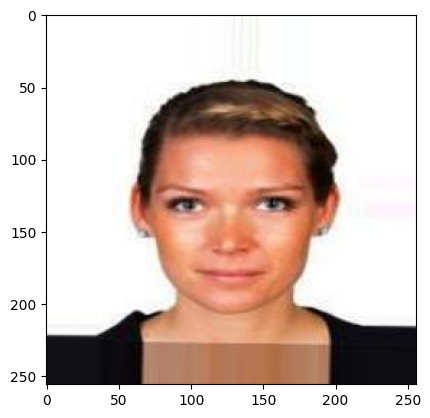

In [13]:
import matplotlib.pyplot as plt

img = plt.imread('./Results/human2catsdogs/test_latest/images/121565_real.png')
plt.imshow(img)

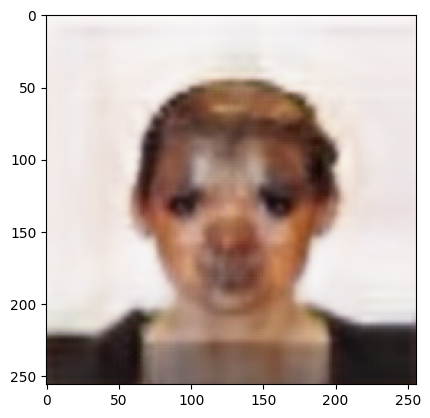

In [14]:
img = plt.imread('./Results/human2catsdogs/test_latest/images/121565_fake.png')
plt.imshow(img)

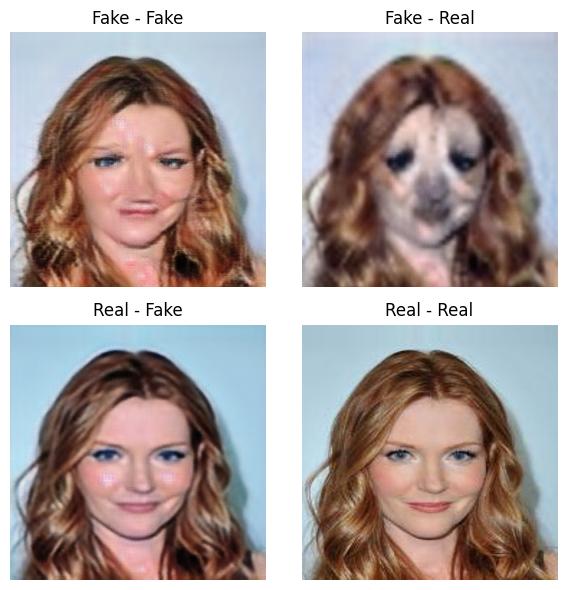

In [23]:
import os
import matplotlib.pyplot as plt

# Define the location prefix
location = './TestAResultReverse/human2catsdogs_pretrained/test_latest/images/'

# List of specific image filenames (without the location prefix)
image_filenames = ['121588_fake_fake.png', '121588_fake_real.png', '121588_real_fake.png', '121588_real_real.png']
captions = ['Fake - Fake', 'Fake - Real', 'Real - Fake', 'Real - Real']

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Loop through each image filename and caption, load the image, and plot it with its caption
for idx, (filename, caption) in enumerate(zip(image_filenames, captions)):
    # Load the image
    image_path = os.path.join(location, filename)
    image = plt.imread(image_path)

    # Plot the image and caption
    ax = axes[idx // 2, idx % 2]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(caption, fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### **CONCLUSION** :

The application of the pre-existing CycleGAN model to our dataset has been successful. While attempting to utilize the Keras implementation during this assignment, I encountered significant challenges in reproducing the desired results. As an alternative, I recommend users explore PyTorch for its simplicity and effectiveness in achieving satisfactory outcomes. With additional time and resources, there is a potential to train a flawless model.

In the process, efforts were made to visualize the cycle consistency loss within the model. As evident from the provided output, the "Real-Real" images represent the true images, while the "Fake-Real" images are generated by the model using the mapping G: A -> B. Subsequently, the "Fake-Fake" images were subjected to the reverse model, F: B -> A, to revert them back to their original form, resulting in the "Fake-Fake" images again. This is exactly not same as input but has converted to great extent proving models success.

**Steps to reproduce :**

1.Clone the CycleGAN model repository using the following command:
bash
>>!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

2.Navigate to the cloned repository directory:
bash
>>cd pytorch-CycleGAN-and-pix2pix

3.Prepare your dataset within the /dataset folder, including trainA, trainB, testA, and testB subfolders.

4.Train a new model by leveraging the existing CycleGAN model architecture and save checkpoints:
>>python train.py --dataroot ./datasets/dataset_name --name experiment_name --model cycle_gan

5.To reload the trained model, execute the test command with the location of the checkpoint and the new model as demonstrated in the Reproducibility of Model section above.

6.Specify the transformation you wish to perform using the cp command, indicating whether you want to transform images from domain A to B (G:A->B) or from domain B to A (F:B->A), as explained in the previous section.
